<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Tarea_3_ML_estad%C3%ADstica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 3 ML: estadística Descriptiva

Despues de validad que la data estuviera limpia en el análisis pasado procedemos a plantear estadísticos para entender cómo se encuentran las variables

In [1]:
#importamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [41]:
#importamos librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("gdrive/MyDrive/Maestría Ciencia de Datos/MachineLearningUANL/ChurnDataSet.csv")
df.set_index('customerID', inplace = True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [81]:
def transform_float(x):
    try:
        x = float(x)
        return x
    except:
        return None
        
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: transform_float(x))
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].astype(float)

Para este set de datos nos interesa describir las variables numéricas y catégoricas

##Variables Categoricas

para las variables categóricas necesitamos definir aquellas que se encuentren codificadas y cuales no, para ello buscaremos tipos de variables OBJECT

In [82]:
def pieplot(labels, sizes, title):
    import matplotlib.pyplot as plt
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    #labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
    #sizes = [15, 30, 45, 10]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    return plt.show()

gender


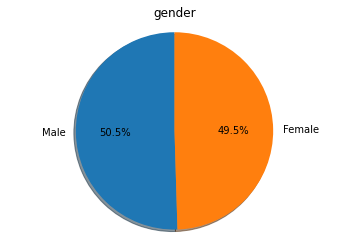

Partner


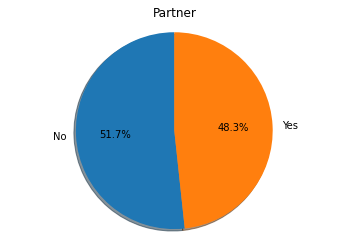

Dependents


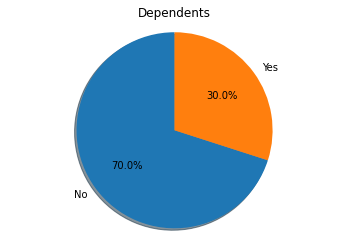

PhoneService


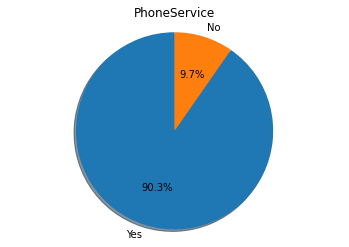

MultipleLines


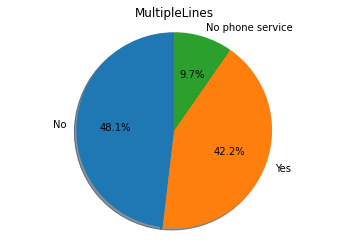

InternetService


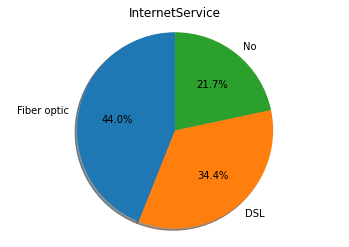

OnlineSecurity


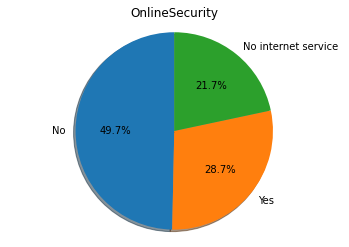

OnlineBackup


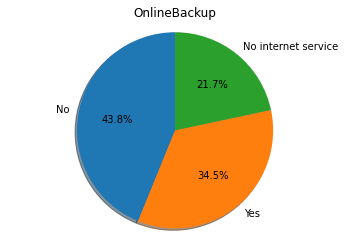

DeviceProtection


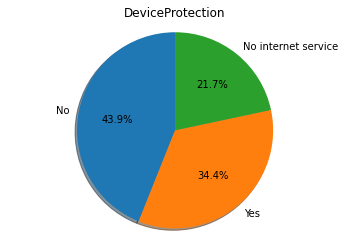

TechSupport


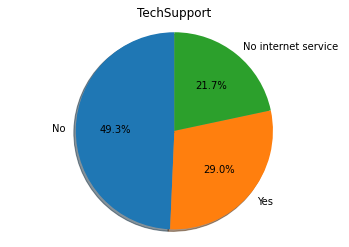

StreamingTV


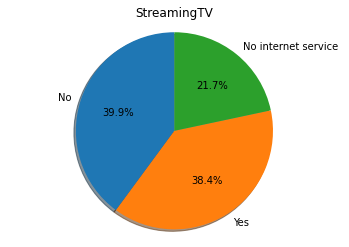

StreamingMovies


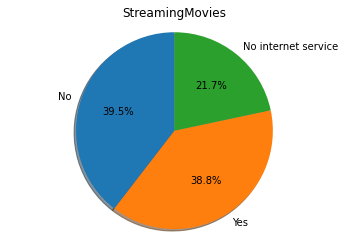

Contract


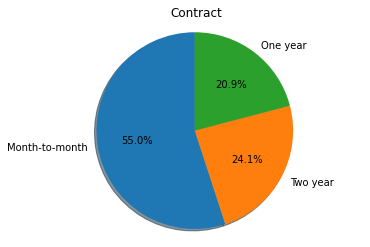

PaperlessBilling


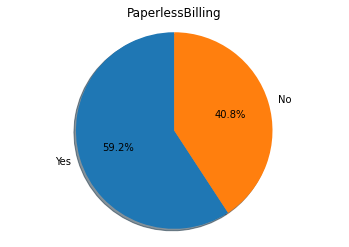

PaymentMethod


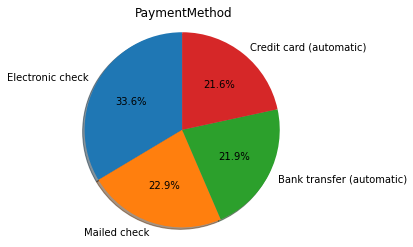

Churn


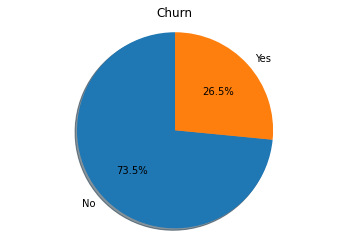

In [83]:
for i in df.loc[:,df.dtypes == 'object'].columns:
    if i == 'TotalCharges':
        pass
    print(i)
    labels = df[i].value_counts().index
    size = df[i].value_counts().values
    title  = i
    pieplot(labels, size, title)


Las graficas de pie nos dan información importante:

    •	El género de los usuarios es del 50/50
    •	Sólo el 51.7% de los clientes cuentan con pareja/socio
    •	El 30% de los usuarios tiene dependiente
    •	el 90% cuenta con servicio de teléfono
    •	de este 90% el 42% cuenta con múltiples líneas
    •	de los usuarios que cuentan con internet, el 44% cuenta con fibra óptica 
    •	el 21.7% no cuenta con servicio de internet
    •	 28.7% de los usuarios cuentan con seguridad en línea
    •	De los clientes el 34.5% cuenta con un respaldo en la nube
    •	34% de los usuarios cuentan con protección de su dispositivo
    •	El 29% cuenta con soporte de cliente/tecnología
    •	De los clientes que cuentan con internet el 38.5% de los usuarios cuentan con servicio de streaming de televisión
    •	El 38.8% de los clientes cuentan con un servicio de streaming de películas
    •	Del total de los clientes el 26.5% de los clientes nos abandonó

## Variables Numéricas

In [93]:
num_cols =  ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


de las variables numéricas que tenemos podemos generar una estadística descriptiva de los datos, además nos podemos dar cuenta de que la variable de **SeniorCitizen** en realidad es una variable booleana, con las demás variables procedemos a realizar una matriz de correlación:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

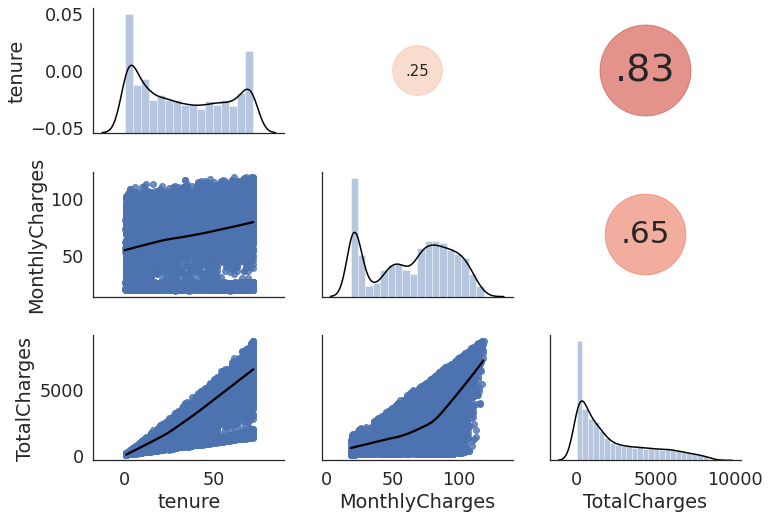

In [90]:
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
num_cols =  ['tenure', 'MonthlyCharges', 'TotalCharges']

g = sns.PairGrid(df[num_cols], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

las variables de Tenure y totalCharges se encuentran altamente correlacionadas (0.85) sin embargo al ver la distribución de ambas variables podemos inferir que es debido a que al ser la variable de totalCharges aumenta a medida que aumenta la antigüedad del cliente.

Por otro lado la variable de MonthlyCharges y TotalCharges tiene un valor de correlación aceptable (0.65).

Enseguida realizaremos pruebas de bondad de ajuste para la variable Montly Charges:

In [91]:
#realizamos prueba de bondad de ajuste...
from scipy.stats import shapiro

stat, p = shapiro(df.MonthlyCharges.sample(100))
alpha = 0.05
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}')
else:
    print(f'La distribución parece normal con p = {round(p, 4)} ')

La distribución no parece normal con p = 0.0
